In [1]:
import numpy as np
import os,cv2,glob
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe as mp
from matplotlib import pyplot as plt
from mat4py import loadmat
import glob
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading the data


In [2]:
# Directory containing the face images
dir_path = 'M:\ITI MAT\ML1\AFLW2000'

os.chdir(dir_path)

# Get a list for .mat files in current folder
mat_files = glob.glob('*.mat')

# List for stroring all the data
all_labels = []
pitch = []
yaw = []
roll = []
labels = []
# Iterate mat files
for fname in mat_files:
    # Load mat file data into data.
    data = loadmat(fname)

    # Append data to the list
    all_labels.append(data)


In [3]:

# Get a list for .jpg files in current folder
jpg_files = glob.glob('*.jpg')

# List for stroring all the data
all_data = []

# Iterate .jpg files
for fname in jpg_files:
    # Load mat file data into data.
    data = cv2.imread(fname)

    # Append data to the list
    all_data.append(data)


In [4]:
def extract_features(image):
    xy =[]
    faceModule = mp.solutions.face_mesh
    # loading image and its correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
        # looping over the faces in the image
            for face in results.multi_face_landmarks:
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                    shape = image.shape 
                    xy.append(x)
                    xy.append(y)
                    
    return np.array(xy)

In [5]:
len(all_data[0]) == 936

False

In [7]:
x = []
y = []
for i in range (len(all_data)):
    feature = extract_features(all_data[i])
    if len(feature) == 936:
        x.append(feature)
        y.append(all_labels[i])
x = np.array(x)


In [8]:
all_data =x
all_labels =y

preparing the data for training

In [9]:
all_data.reshape(-1,936)
all_data.shape

(1853, 936)

In [10]:
# extracting the labels 3 angels
for data in all_labels:
    pose_para = data["Pose_Para"][:3]
    labels.append(pose_para)
    pitch.append(pose_para[0])
    yaw.append(pose_para[1])
    roll.append(pose_para[2])

In [11]:
# Split the data into training and test sets
x_train_p, x_test_val_p, y_train_p, y_test_val_p = train_test_split(all_data, pitch, test_size=0.4, random_state=42)
x_validation_p, x_test_p, y_validation_p, y_test_p = train_test_split(x_test_val_p, y_test_val_p, test_size=0.5, random_state=42)

In [12]:
# Split the data into training and test sets
x_train_y, x_test_val_y, y_train_y, y_test_val_y = train_test_split(all_data, yaw, test_size=0.4, random_state=42)
x_validation_y, x_test_y, y_validation_y, y_test_y = train_test_split(x_test_val_y, y_test_val_y, test_size=0.5, random_state=42)

In [13]:
# Split the data into training and test sets
x_train_r, x_test_val_r, y_train_r, y_test_val_r = train_test_split(all_data, roll, test_size=0.4, random_state=42)
x_validation_r, x_test_r, y_validation_r, y_test_r = train_test_split(x_test_val_r, y_test_val_r, test_size=0.5, random_state=42)

Exploring svr model results

In [14]:
# Train a Support Vector Machine (SVM) regressor on the training data
regressor_p = SVR(kernel="linear")
regressor_p.fit(x_train_p, y_train_p)

# Make predictions on the validation data 
y_pred_val = regressor_p.predict(x_validation_p)

# Evaluate the performance of the regressor
mse = mean_squared_error(y_validation_p, y_pred_val)
mae = mean_absolute_error(y_validation_p, y_pred_val)
print("Mean Squared Error linear:", mse)
print("Mean Absolute Error linear:", mae)

Mean Squared Error linear: 0.06282937897007497
Mean Absolute Error linear: 0.11206656822709019


In [15]:
# Train a Support Vector Machine (SVM) regressor on the training data
regressor_y = SVR(kernel="linear")
regressor_y.fit(x_train_y, y_train_y)

# Make predictions on the validation data 
y_pred_val = regressor_y.predict(x_validation_y)

# Evaluate the performance of the regressor
mse = mean_squared_error(y_validation_y, y_pred_val)
mae = mean_absolute_error(y_validation_y, y_pred_val)
print("Mean Squared Error linear:", mse)
print("Mean Absolute Error linear:", mae)

Mean Squared Error linear: 0.027463003104364902
Mean Absolute Error linear: 0.101667436713204


In [16]:
# Train a Support Vector Machine (SVM) regressor on the training data
regressor_r = SVR(kernel="linear")
regressor_r.fit(x_train_r, y_train_r)

# Make predictions on the validation data 
y_pred_val = regressor_r.predict(x_validation_r)

# Evaluate the performance of the regressor
mse = mean_squared_error(y_validation_r, y_pred_val)
mae = mean_absolute_error(y_validation_r, y_pred_val)
print("Mean Squared Error linear:", mse)
print("Mean Absolute Error linear:", mae)

Mean Squared Error linear: 0.05917563651712595
Mean Absolute Error linear: 0.09161354512495942


In [17]:
# Train a Support Vector Machine (SVM) regressor on the training data
regressor2_p = SVR(kernel= "rbf")
regressor2_p.fit(x_train_p, y_train_p)

# Make predictions on the validation data 
y_pred_val2 = regressor2_p.predict(x_validation_p)

# Evaluate the performance of the regressor
mse2 = mean_squared_error(y_validation_p, y_pred_val2)
mae2 = mean_absolute_error(y_validation_p, y_pred_val2)
print("Mean Squared Error rbf:", mse2)
print("Mean Absolute Error rbf:", mae2)

Mean Squared Error rbf: 0.05606993882211022
Mean Absolute Error rbf: 0.09904784546842245


In [18]:
# Train a Support Vector Machine (SVM) regressor on the training data
regressor2_y = SVR(kernel= "rbf")
regressor2_y.fit(x_train_y, y_train_y)

# Make predictions on the validation data 
y_pred_val2 = regressor2_y.predict(x_validation_y)

# Evaluate the performance of the regressor
mse2 = mean_squared_error(y_validation_y, y_pred_val2)
mae2 = mean_absolute_error(y_validation_y, y_pred_val2)
print("Mean Squared Error rbf:", mse2)
print("Mean Absolute Error rbf:", mae2)

Mean Squared Error rbf: 0.024884991712276365
Mean Absolute Error rbf: 0.07852614983187449


In [19]:
# Train a Support Vector Machine (SVM) regressor on the training data
regressor2_r = SVR(kernel= "rbf")
regressor2_r.fit(x_train_r, y_train_r)

# Make predictions on the validation data 
y_pred_val2 = regressor2_r.predict(x_validation_r)

# Evaluate the performance of the regressor
mse2 = mean_squared_error(y_validation_r, y_pred_val2)
mae2 = mean_absolute_error(y_validation_r, y_pred_val2)
print("Mean Squared Error rbf:", mse2)
print("Mean Absolute Error rbf:", mae2)

Mean Squared Error rbf: 0.049752632147630954
Mean Absolute Error rbf: 0.07553977322692401


In [20]:
# Save the model to a file

with open('model_y.pkl', 'wb') as fy:
    pickle.dump(regressor2_y, fy)

In [21]:
with open('model_p.pkl', 'wb') as fp:
    pickle.dump(regressor2_p, fp)

In [22]:
with open('model_r.pkl', 'wb') as fr:
    pickle.dump(regressor2_r, fr)

In [23]:
import pickle

# Load the model from a file
with open('model_p.pkl', 'rb') as fp:
    regressor2_p = pickle.load(fp)
with open('model_y.pkl', 'rb') as fy:
    regressor2_y = pickle.load(fy)
with open('model_r.pkl', 'rb') as fr:
    regressor2_r = pickle.load(fr)

Test the choosen model svr

In [24]:
# Make predictions on the validation data 
y_pred_p = regressor2_p.predict(x_test_p)
y_pred_y = regressor2_y.predict(x_test_y)
y_pred_r = regressor2_r.predict(x_test_r)


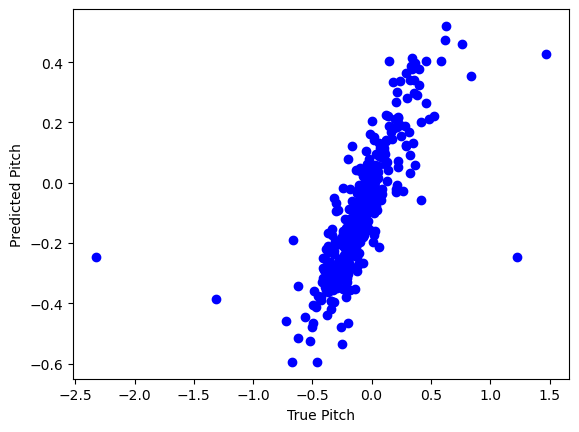

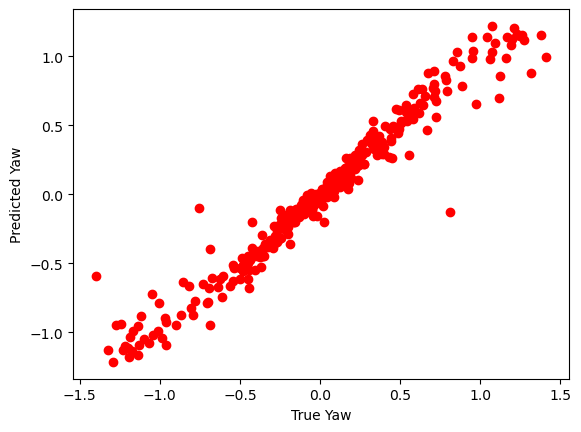

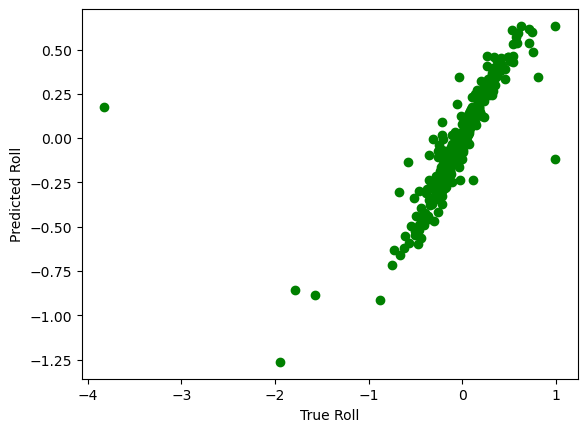

In [25]:
# Plot the true vs predicted values
plt.scatter(y_test_p, y_pred_p, color="blue")
plt.xlabel("True Pitch")
plt.ylabel("Predicted Pitch")
plt.show()

plt.scatter(y_test_y, y_pred_y, color="red")
plt.xlabel("True Yaw")
plt.ylabel("Predicted Yaw")
plt.show()

plt.scatter(y_test_r, y_pred_r, color="green")
plt.xlabel("True Roll")
plt.ylabel("Predicted Roll")
plt.show()

Loading the video data

In [26]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [ ]:
# Load the video data
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('video.avi', fourcc, 20.0, size)
# Loop over each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        # Pre-process the frame data (face detection, alignment, feature extraction)
        features = extract_features(frame)
        features = features.reshape(1,-1)
        # Predict the head pose
        y_pred_p = regressor2_p.predict(features)
        y_pred_y = regressor2_y.predict(features)
        y_pred_r = regressor2_r.predict(features)
    
        # Visualize the results
        img = draw_axis(frame, y_pred_p, y_pred_y, y_pred_r ,feature[6]*width, feature[7]*height)
        cv2.imshow('Head Pose Estimation', img)
        out.write(img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()